In [1]:
import numpy as np
import matplotlib.pyplot as plt

# What is our distribution ?
$$
X_t \sim \mathcal{N}(0, t) \\
p(x)=\frac{1}{t\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x}{t})^2}
$$

In [2]:
x_max = 3
x_min = - x_max
t_min = 1
t_max = 2
x, t = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(t_min, t_max, 100))

In [3]:
def normalPdf(x, mu=0, sigma=1):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-1/2 * ((x - mu)/sigma)**2)

In [4]:
p = normalPdf(x, sigma=t)

Text(0.5, 0, 'p(x)')

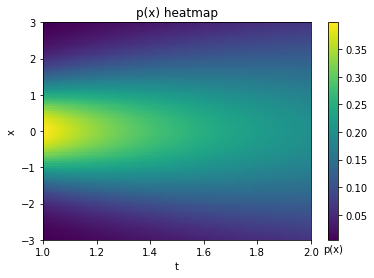

In [5]:
fig, axes = plt.subplots()
min_p, max_p = p.min(), p.max()
p = axes.pcolormesh(t, x, p, vmin=min_p, vmax=max_p)

t_test = np.linspace(1, 2, num=10)
x_test = np.linspace(-3, 3, num=5)

axes.set_title('p(x) heatmap')
axes.axis([t_min, t_max, x_min, x_max])
axes.set_xlabel('t')
axes.set_ylabel('x')
clb = fig.colorbar(p)
clb.ax.set_xlabel('p(x)')

# Generating training data

In [6]:
t_data = np.linspace(1, 2, num=10)
x_data = np.random.rand(2048, 1, 1) * x_max * 2 - x_max

In [8]:
data = [] # shape will be (N, t, x)
for i in t_data:
    data.append(np.concatenate([x_data, normalPdf(x_data, sigma=i)], axis=2))
data_n = np.concatenate(data, axis=1)

In [9]:
data_n.shape

(2048, 10, 2)